In [ ]:
from nav_sim_modules.actioner import HeuristicAutonomousActioner
from nav_sim_modules.scener import ChestSearchRoomScener

import numpy as np
import matplotlib.pyplot as plt


scene = ChestSearchRoomScener()
scene.generate_scene()

robot = HeuristicAutonomousActioner()
pose = scene.spawn()
robot.initialize(env_pixel=scene.env_pixel, global_pose=pose)

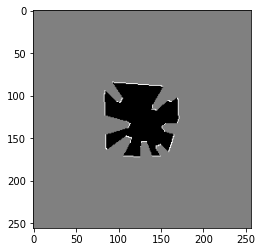

In [9]:
occ = np.copy(robot.occupancy_map)
occ[occ==-1] = 50
plt.imshow(occ, cmap='gray')

In [11]:
before = np.copy(robot.pose)
before

array([ 0.668879  , -0.11605708,  1.03198885])

In [12]:
robot.do_action([0.0, -1.0, 0])

start: (134, 126, 1.0319888517675335), goal: (128, 118, 0)


In [13]:
after = np.copy(robot.pose)
after

array([ 0., -1.,  0.])

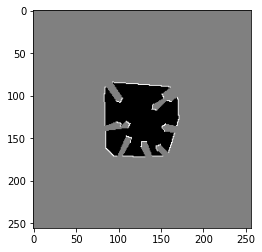

In [14]:
occ2 = np.copy(robot.occupancy_map)
occ2[occ2==-1] = 50
plt.imshow(occ2, cmap='gray')

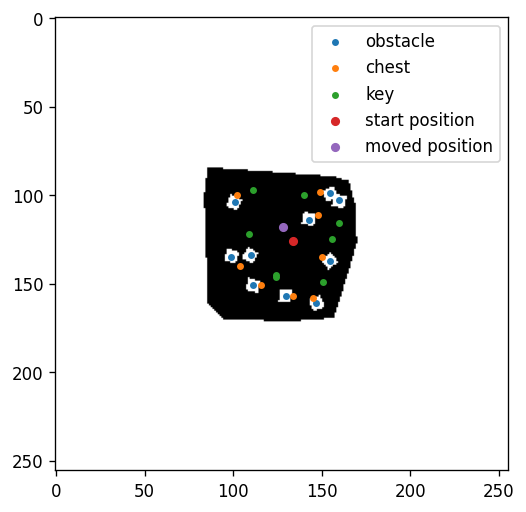

In [19]:
occ3 = np.copy(scene.env_pixel)
occ3[occ3==-1] = 50

plt.figure(figsize=(5,5), dpi=120)

obs = scene.components_info['obstacle']
che = scene.components_info['chest']
key = scene.components_info['key']

plt.imshow(occ3, cmap='gray')

obs_xy = np.array([robot.navs.con2pix(o) for o in obs])
che_xy = np.array([robot.navs.con2pix(c) for c in che])
key_xy = np.array([robot.navs.con2pix(k) for k in key])
before_xy = robot.navs.con2pix(before)
after_xy = robot.navs.con2pix(after)

plt.scatter(obs_xy[:,0], obs_xy[:,1], s=10)
plt.scatter(che_xy[:,0], che_xy[:,1], s=10)
plt.scatter(key_xy[:,0], key_xy[:,1], s=10)
plt.scatter(before_xy[0], before_xy[1], s=20)
plt.scatter(after_xy[0], after_xy[1], s=20)
plt.legend(["obstacle", "chest", "key", "start position", "moved position"])